In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# split the data into dependent and independent

X = df.drop("math_score", axis=1)
y = df['math_score']

X.shape, y.shape

((1000, 7), (1000,))

In [14]:
# feature engineering and  applying transformation

numerical_features=X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("one_hotencoder", OneHotEncoder(handle_unknown='ignore')),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical_pipeline", num_pipeline, numerical_features),
        ("categorical_pipeline", cat_pipeline, categorical_features)
    ]
)

In [15]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['reading_score', 'writing_score'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hotencoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object'))])

In [17]:
X=preprocessor.fit_transform(X)

In [18]:
X

array([[ 0.19399858,  0.39149181,  2.00129726, ...,  2.08980597,
         0.        ,  2.08588794],
       [ 1.42747598,  1.31326868,  2.00129726, ...,  2.08980597,
         2.08588794,  0.        ],
       [ 1.77010859,  1.64247471,  2.00129726, ...,  2.08980597,
         0.        ,  2.08588794],
       ...,
       [ 0.12547206, -0.20107904,  2.00129726, ...,  0.        ,
         2.08588794,  0.        ],
       [ 0.60515772,  0.58901542,  2.00129726, ...,  2.08980597,
         2.08588794,  0.        ],
       [ 1.15336989,  1.18158627,  2.00129726, ...,  0.        ,
         0.        ,  2.08588794]])

In [19]:
# evaluate metrics for model training

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
def evaluate_models(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, mse, rmse, r2_square

In [22]:
# importing libary for model training
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
RandomForestRegressor,
AdaBoostRegressor,
GradientBoostingRegressor
)
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor


In [23]:
# split the data into train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [24]:
# Iniliazing model
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random forest Regressor": RandomForestRegressor(),
    "Linear Regressor": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "catboosting regressor": CatBoostRegressor(),
    "xgboosting regressor": XGBRFRegressor(),
    "Adaboosting regressor": AdaBoostRegressor(),
    "Gradient Decent regressor": GradientBoostingRegressor(),
    "support vector machine": SVR()
}

In [46]:
model_list = []
r2_list_train = []
r2_list_test = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Prediction with training and testing dataset
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate the model with training and testing dataset
    y_train_mae, y_train_mse, y_train_rmse, y_train_r2 = evaluate_models(y_train,y_train_pred)
    y_test_mae, y_test_mse, y_test_rmse, y_test_r2 = evaluate_models(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("="*80)

    

    print(f"Model:{model}")

    print("model performance with training dataset")
    print("- MAE:{:.4f} ".format(y_train_mae))
    print("- MSE:{:.4f} ".format(y_train_rmse))
    print("- RMSE:{:.4f} ".format(y_train_mse))
    print("- R2:{:.4f} ".format(y_train_r2))
    
    print("model performance with testing dataset") 
    print("- MAE:{:.4f} ".format(y_test_mae))
    print("- MSE:{:.4f} ".format(y_test_rmse))
    print("- RMSE:{:.4f} ".format(y_test_mse))
    print("- R2:{:.4f} ".format(y_test_r2))

    r2_list_test.append(y_test_r2)
    r2_list_train.append(y_train_r2)

print("="*35)
print("\n")



Decision Tree Regressor
Model:DecisionTreeRegressor()
model performance with training dataset
- MAE:0.0187 
- MSE:0.2795 
- RMSE:0.0781 
- R2:0.9997 
model performance with testing dataset
- MAE:6.3500 
- MSE:8.0069 
- RMSE:64.1100 
- R2:0.7365 
Random forest Regressor
Model:RandomForestRegressor()
model performance with training dataset
- MAE:1.8407 
- MSE:2.3203 
- RMSE:5.3839 
- R2:0.9761 
model performance with testing dataset
- MAE:4.6636 
- MSE:6.0311 
- RMSE:36.3746 
- R2:0.8505 
Linear Regressor
Model:LinearRegression()
model performance with training dataset
- MAE:4.2745 
- MSE:5.3501 
- RMSE:28.6240 
- R2:0.8730 
model performance with testing dataset
- MAE:4.2203 
- MSE:5.3856 
- RMSE:29.0047 
- R2:0.8808 
Ridge
Model:Ridge()
model performance with training dataset
- MAE:4.2650 
- MSE:5.3232 
- RMSE:28.3366 
- R2:0.8743 
model performance with testing dataset
- MAE:4.2126 
- MSE:5.3909 
- RMSE:29.0623 
- R2:0.8806 
Lasso
Model:Lasso()
model performance with training dataset


In [48]:
pd.DataFrame(list(zip(model_list,r2_list_test,r2_list_train)),columns=['model name', 'r2 score test', 'r2 score train']).sort_values(by=['r2 score test'],ascending=False)

,model name,r2 score test,r2 score train
2,Linear Regressor,0.880805,0.873035
3,Ridge,0.880568,0.874310
8,Gradient Decent regressor,0.872267,0.905040
6,xgboosting regressor,0.866120,0.901613
4,Lasso,0.856323,0.845424
7,Adaboosting regressor,0.854515,0.850080
5,catboosting regressor,0.851632,0.958936
1,Random forest Regressor,0.850518,0.976119
0,Decision Tree Regressor,0.736540,0.999653
9,support vector machine,0.687200,0.755776


In [49]:
# applying hyperparameter using grid search cv

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    "Decision Tree":{'max_features':[None,3,5]},
    'Linear Regressor': {},
    "Lasso": {'alpha': [0.1,1,10]},
    "Ridge":{'alpha': [0.1,1,10]},
    "Random forest Regressor": {'n_estimators':[3,5,7]},
    "Xgboosting regressor": {'n_estimators':[50,100,300]},
    "catboosting regressor": {'iterations':[1,10,100]},
    "grandient Decent Regressor": {'n_estimators':[50,100,300]},
    "Adaboosting regressor": {'n_estimators':[100,200,300]},
    "support vector machine": {}
}

In [66]:
best_models = {}
r2_list_grid_train = []
r2_list_grid_test = []

for model_name, model in models.items():
    if model_name in param_grid:
        search_grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='r2')
        search_grid.fit(X_train, y_train)
        best_models[model_name] = search_grid.best_estimator_
        print(f"Best Parameter:{model_name} : {search_grid.best_params_}")
    else:
        best_models[model_name] = model
        best_models[model_name].fit(X_train, y_train)

    # prediction with training and testing dataset
    y_train_grid_pred = best_models[model_name].predict(X_train)
    y_test_grid_pred = best_models[model_name].predict(X_test)
    
    
    # evaluate the model with training and testing dataset
    y_train_grid_mae, y_train_grid_mse, y_train_grid_rmse, y_train_grid_r2 = evaluate_models(y_train, y_train_grid_pred)
    y_test_grid_mae, y_test_grid_mse, y_test_grid_rmse , y_test_grid_r2 = evaluate_models(y_test, y_test_grid_pred)
   

    print("="*80)
    print(f"Best Model: {best_models[model_name]}")
    
    print("model performance with training dataset")
    print("- MAE:{:.4f}".format(y_train_grid_mae))
    print("- MSE: {:.4f} ".format(y_train_grid_mse))
    print("- RMSE: {:.4f} ".format(y_train_grid_rmse))
    print("- R2: {:.4f} ".format(y_train_grid_r2))
    
    
    print("model performance with testing dataset")
    print("- MAE:{:.4f}".format(y_test_grid_mae))
    print("- MSE: {:.4f} ".format(y_test_grid_mse))
    print("- RMSE: {:.4f} ".format(y_test_grid_rmse))
    print("- R2: {:.4f} ".format(y_test_grid_r2))
    
    r2_list_grid_test.append(y_test_grid_r2)
    r2_list_grid_train.append(y_train_grid_r2)



print("="*35)
print("/n")

    
    





Best Model: DecisionTreeRegressor()
model performance with training dataset
- MAE:0.0187
- MSE: 0.0781 
- RMSE: 0.2795 
- R2: 0.9997 
model performance with testing dataset
- MAE:6.2750
- MSE: 65.0450 
- RMSE: 8.0650 
- R2: 0.7327 
Best Parameter:Random forest Regressor : {'n_estimators': 7}
Best Model: RandomForestRegressor(n_estimators=7)
model performance with training dataset
- MAE:2.0795
- MSE: 7.8831 
- RMSE: 2.8077 
- R2: 0.9650 
model performance with testing dataset
- MAE:5.0336
- MSE: 40.4553 
- RMSE: 6.3604 
- R2: 0.8337 
Best Parameter:Linear Regressor : {}
Best Model: LinearRegression()
model performance with training dataset
- MAE:4.2745
- MSE: 28.6240 
- RMSE: 5.3501 
- R2: 0.8730 
model performance with testing dataset
- MAE:4.2203
- MSE: 29.0047 
- RMSE: 5.3856 
- R2: 0.8808 
Best Parameter:Ridge : {'alpha': 0.1}
Best Model: Ridge(alpha=0.1)
model performance with training dataset
- MAE:4.2665
- MSE: 28.3349 
- RMSE: 5.3231 
- R2: 0.8743 
model performance with testing

In [68]:
pd.DataFrame(list(zip(best_models.keys(), r2_list_grid_test, r2_list_grid_train)), columns=['best model name', 'r2 score grid test','r2 score grid train']).sort_values(by=['r2 score grid test'],ascending=False)

,best model name,r2 score grid test,r2 score grid train
4,Lasso,0.882087,0.873588
2,Linear Regressor,0.880805,0.873035
3,Ridge,0.880448,0.874317
8,Gradient Decent regressor,0.872188,0.905040
6,xgboosting regressor,0.866120,0.901613
7,Adaboosting regressor,0.848586,0.855752
5,catboosting regressor,0.845898,0.942285
1,Random forest Regressor,0.833749,0.965033
0,Decision Tree Regressor,0.732697,0.999653
9,support vector machine,0.687200,0.755776


In [69]:
# after applied hyperparameter best model found lasso

In [71]:
lasso_param = {
    'alpha': [0.1,1,10]
}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model,lasso_param, cv=5, scoring="r2")
lasso_fit=lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_fit.predict(X_test)
lasso_score = r2_score(y_test, lasso_pred)*100
print(f"Model score is: {lasso_score} ")

Model score is: 88.2086921452269 


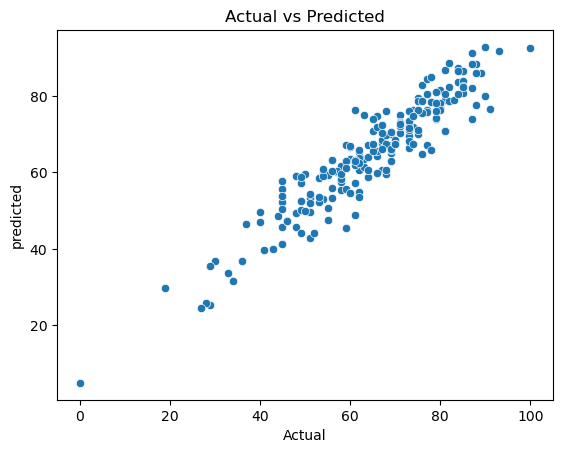

In [73]:
sns.scatterplot(x=y_test, y=lasso_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

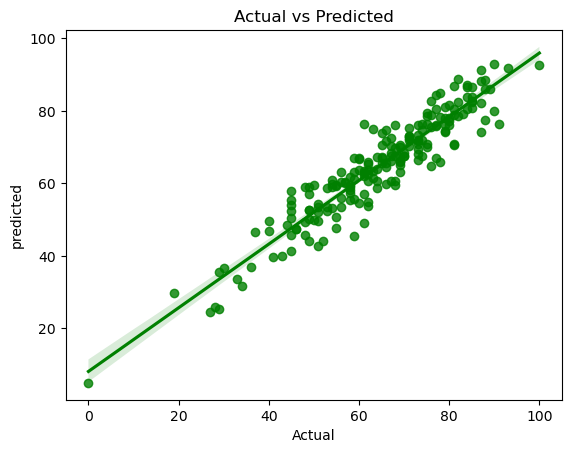

In [74]:
sns.regplot(x=y_test, y=lasso_pred, color='g')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

C:\Users\ramn\AppData\Local\Temp\ipykernel_12564\4194787870.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, kde=True, hist=False,color='b')
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


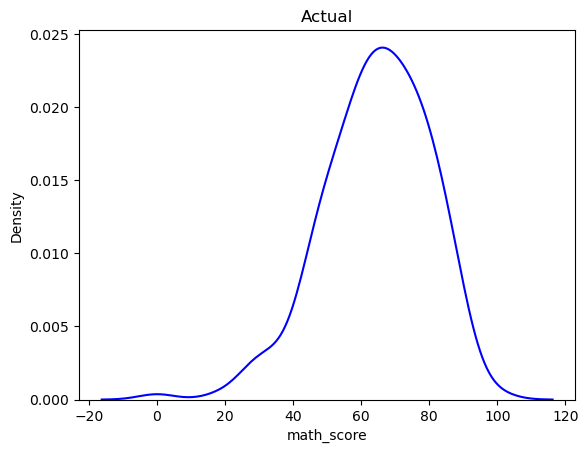

C:\Users\ramn\AppData\Local\Temp\ipykernel_12564\4194787870.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_pred, kde=True, hist=False, color='g')
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


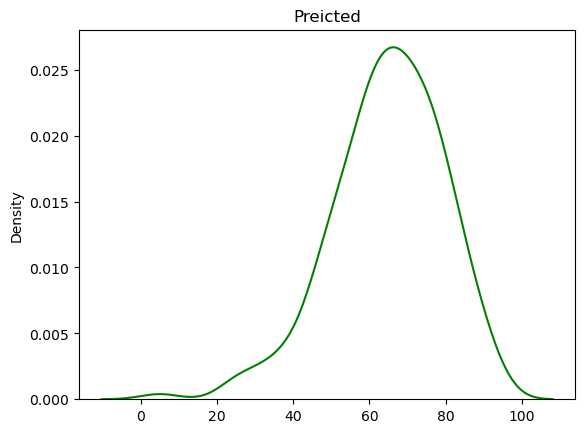

In [77]:
sns.distplot(y_test, kde=True, hist=False,color='b')
plt.title("Actual")
plt.show()
print("=========================================================================================================")

sns.distplot(lasso_pred, kde=True, hist=False, color='g')
plt.title("Preicted")
plt.show()

In [78]:
# Difference between actual and predicted
pd.DataFrame({
    'Actual': y_test, "predicted":lasso_pred, "Difference": y_test - lasso_pred
})

,Actual,predicted,Difference
521,91,76.487415,14.512585
737,53,58.645233,-5.645233
740,80,77.226523,2.773477
660,74,76.426131,-2.426131
411,84,87.211346,-3.211346
...,...,...,...
408,52,44.127513,7.872487
332,62,62.519146,-0.519146
208,74,67.470853,6.529147
613,65,67.329326,-2.329326
